### setup

In [147]:
import pandas as pd
import seaborn

df = pd.read_csv('D:/Programming Projects/fitbit-data-analysis/health-data.csv')

df['date'] = pd.to_datetime(df['date']) # convert the dates to datetimes

In [148]:
def get_dom(dt):
    return dt.day

df['day_of_month'] = df['date'].map(get_dom)

In [149]:
def get_weekday(dt):
    return dt.weekday()

df['weekday'] = df['date'].map(get_weekday)

In [150]:
def get_month(dt):
    return dt.month

df['month'] = df['date'].map(get_month)

### Make the date column the index, so that when we start making funky graphs the x-axis is formatted nicely

In [90]:
df.set_index("date", inplace=True) # make the date column the index

### return first 5 rows

In [151]:
df.head()

,date,steps,distance,altitude,calories,day_of_month,weekday,month
0,2017-06-19,0,0.00,0,1642,19,0,6
1,2017-06-20,0,0.00,0,1642,20,1,6
2,2017-06-21,12231,8.88,21,2719,21,2,6
3,2017-06-22,16276,11.82,30,2876,22,3,6
4,2017-06-23,14781,10.80,40,2792,23,4,6


### return last 3 rows

In [126]:
df.tail(3)

,date,steps,distance,altitude,calories,day_of_month,weekday,month
567,2019-01-07,5371,3.03,15,2152,7,0,1
568,2019-01-08,14439,8.46,36,2665,8,1,1
569,2019-01-09,13003,7.49,33,2610,9,2,1


### access the steps column only

In [78]:
df["steps"].tail(6)

date
2019-01-04     2841
2019-01-05    16587
2019-01-06     6359
2019-01-07     5371
2019-01-08    14439
2019-01-09    13003
Name: steps, dtype: int64

In [128]:
highSteps = df[ df['steps'] > 30000 ]

highSteps

,date,steps,distance,altitude,calories,day_of_month,weekday,month,stepsMonthlyAvg
18,2017-07-07,42053,30.55,223,4943,7,4,7,NaN
54,2017-08-12,31270,22.77,63,4021,12,5,8,9421.433333
57,2017-08-15,30673,22.27,34,3780,15,1,8,10988.866667
65,2017-08-23,31666,23.00,10,3945,23,2,8,15536.233333
429,2018-08-22,32911,18.21,318,3919,22,2,8,10781.033333
463,2018-09-25,33355,18.54,106,3873,25,1,9,12891.266667
474,2018-10-06,38465,21.36,428,4437,6,5,10,15604.300000
530,2018-12-01,36255,19.72,379,4227,1,5,12,9184.733333


### plotting steps

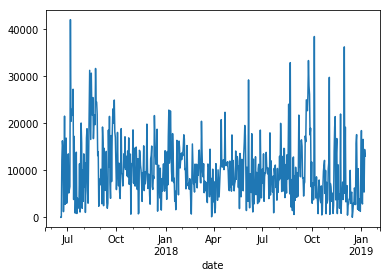

In [80]:
df['steps'].plot();

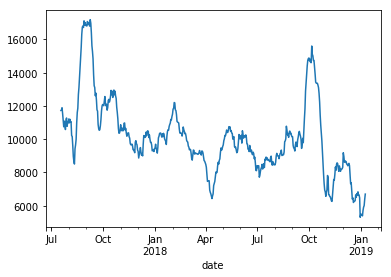

In [81]:
df['steps'].rolling(30).mean().plot()

In [152]:
df['stepsMonthlyAvg'] = df['steps'].rolling(30).mean()

In [145]:
#gb = df.groupby("weekday")
#gb.get_group(0)['steps'].mean() # get all Mondays
#gb.get_group(1)['steps'].mean() # get all Tuesdays
#gb.get_group(2)['steps'].mean() # get all Wednesdays

weeklyData = pd.DataFrame()
for avgData, group in df.groupby('weekday'):
    weeklyData = group.set_index('steps')[['steps']].rename(columns={'steps':avgData})
        
weeklyData

AttributeError: 'list' object has no attribute 'mean'

In [154]:
weeklySteps = pd.DataFrame()
for step_count, group in df.groupby("weekday"):
    if (weeklySteps.empty):
        weeklySteps = group.set_index("date")[["steps"]].rename(columns={"steps":step_count})
    else:
        weeklySteps = weeklySteps.join(group.set_index("date")[["steps"]].rename(columns={"steps":step_count}))
        
weeklySteps.head()

,0,1,2,3,4,5,6
date,,,,,,,
2017-06-19,0,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-26,21528,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-03,13494,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-10,23005,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-17,4254,NaN,NaN,NaN,NaN,NaN,NaN
